## Imports

In [1]:
import numpy
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

# Over-sampling for imbalance problem
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

#logestic regression
from sklearn.linear_model import LogisticRegression

# Desicion Tree Classifer
from sklearn.tree import DecisionTreeClassifier 

# SVM Classifier
from sklearn.svm import SVC 

%config InlineBackend.figure_format = 'svg'


/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Pre-process data

In [2]:
os.chdir('/Users/hadi/Documents/Professional_development/DS/INSIGHT/Project/Data/Data_pro')
raw_data=pd.read_csv('Data_All_sorted_alpha_MVP_V9.csv')

#raw_data.index = raw_data.Neighbourhood

Y = pd.DataFrame(raw_data['Label'])

# Features selections
# options -: All fesstures:
X = pd.DataFrame(raw_data[['Home price','Change in housing pricing','Low income population',\
                         'Low income population percentage','Total Area','Total Population',\
                         'Pop  25 - 34 years','Recent Immigrants','TTC Stops','Health Providers','Businesses',\
                         'Social Housing Units','Rent Bank Applicants']])


# options -2: High importance features
# X = pd.DataFrame(raw_data[['Home price','Low income population','Low income population percentage'\
#                            ,'Pop  25 - 34 years',\
#                           'Recent Immigrants','Social Housing Units','Rent Bank Applicants']])


# options -3: Highest linear correlation features
# X = pd.DataFrame(raw_data[['Change in low income pop',\
#                            'Pop  25 - 34 years','Businesses',\
#                            'Social Housing Units']])



X_resampled, y_resampled = SMOTE().fit_resample(X, Y)
print(sorted(Counter(y_resampled).items()))


#Split Test Train Data
#Method -1: None Stratified
    #if original data:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 44)

    #if resampled data:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size = 0.1, random_state = 42)

# #Method -2 : Stratified
# split = StratifiedShuffleSplit(n_splits=1, test_size=.15, random_state=44) # split is to classify for stratify
# for train_index, test_index in split.split(raw_data, raw_data[['Label']]):  # column to use to stratify
#     X_train = X.loc[train_index]
#     X_test = X.loc[test_index]
#     Y_train = Y.loc[train_index]
#     Y_test = Y.loc[test_index]

# encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(Y_train)
# encoded_Y_train = encoder.transform(Y_train)
# # convert integers to dummy variables (i.e. one hot encoded)
# dummy_Y_train = np_utils.to_categorical(encoded_Y_train)

# encoder.fit(Y_test)
# encoded_Y_test= encoder.transform(Y_test)
# # convert integers to dummy variables (i.e. one hot encoded)
# dummy_Y_test= np_utils.to_categorical(encoded_Y_test)

#Standardize the Data
X_train = pd.DataFrame(StandardScaler().fit_transform(X_train)) 
X_test = pd.DataFrame(StandardScaler().fit_transform(X_test))
print(len(Y_test))


[(1, 198), (2, 198), (3, 198), (4, 198), (5, 198)]
99


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Modeling

In [3]:
# LogesticRegression Modelling ------------------------------------

# define model
logisticRegr = LogisticRegression(solver = 'lbfgs')
#from sklearn.utils.validation import column_or_1d
#dummy_Y_train = column_or_1d(Y_train, warn=True)

#if original data be used:
#logisticRegr.fit((X_train, Y_train.values.ravel())

#if resampled data used: (output is np.array)
logisticRegr.fit(X_train, Y_train)

# # save the model to disk
predictive_model_CL_LR = 'finalized_LR_model_CL_V2.sav'
pickle.dump(logisticRegr, open(predictive_model_CL_LR, 'wb'))    

# Desicion Tree Modeling ------------------------------------------

dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, Y_train) 
# # save the model to disk
predictive_model_CL_DT = 'finalized_DT_model_CL_V2.sav'
pickle.dump(dtree_model, open(predictive_model_CL_DT, 'wb')) 

# SVM Modeling ---------------------------------------------------
svm_model_linear = SVC(kernel='rbf', degree=3, C = 1).fit(X_train, Y_train) 
# # save the model to disk
predictive_model_CL_SVM = 'finalized_SVM_model_CL_V2.sav'
pickle.dump(svm_model_linear, open(predictive_model_CL_SVM, 'wb')) 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Validation 

In [4]:
from sklearn.metrics import accuracy_score

# load the model from disk - LR
loaded_model = pickle.load(open('finalized_LR_model_CL_V2.sav', 'rb'))
y_pred_LR= loaded_model.predict(X_test)
print("Logestic Regression method accuracy:"+str(accuracy_score(Y_test,y_pred_LR)))

# load the model from disk - DT
loaded_model = pickle.load(open('finalized_DT_model_CL_V2.sav', 'rb'))
y_pred_DT= loaded_model.predict(X_test)
print("Decision Tree method accuracy:"+str(accuracy_score(Y_test,y_pred_DT)))

# load the model from disk - SVM
loaded_model = pickle.load(open('finalized_SVM_model_CL_V2.sav', 'rb'))
y_pred_SVM= loaded_model.predict(X_test)
print("SVM method accuracy:"+str(accuracy_score(Y_test,y_pred_SVM)))


# Same score can be calculated as following:
# score = logisticRegr.score(X_test, Y_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#mat=confusion_matrix(Y_test,y_pred_LR)
mat=confusion_matrix(Y_test,y_pred_SVM)


Logestic Regression method accuracy:0.6666666666666666
Decision Tree method accuracy:0.48484848484848486
SVM method accuracy:0.8787878787878788


Text(89.18, 0.5, 'True Value')

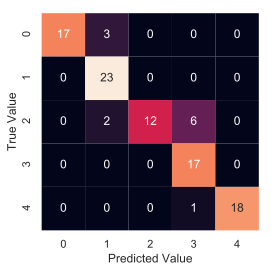

In [5]:
import seaborn as sns; sns.set()
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

### Trying Cross-Validation

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut

#from sklearn import cross_validation
scores=cross_validate.cross_val_score(model, X_train, Y_train.values.ravel(), cv=cross_validation.LeaveOneOut(1))
scores

## Visualisation

In [ ]:
import numpy as np
rng=np.random.RandomState(0)
colors=rng.rand(65)
sizes=1000*rng.rand(65)
plt.scatter(Y_test,y_pred_Gau, c=colors, s=sizes, alpha=0.5, cmap='viridis')
plt.colorbar()
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig('testplot.png')

## Predictions

In [39]:
#Load prediction data 
Test_2016=pd.read_csv('/Users/hadi/Documents/Professional_development/DS/INSIGHT/Project/Data/Data_pro/Data_All_sorted_alpha_MVP_2016_V9.csv')
Test_2016.index = Test_2016.Neighbourhood
Y_2021 = pd.DataFrame(Test_2016['Label'])
# Features selections
#options -: All fesstures:
X_2016 = pd.DataFrame(Test_2016[['Home price','Change in housing pricing','Low income population',\
                         'Low income population percentage','Total Area','Total Population',\
                         'Pop  25 - 34 years','Recent Immigrants','TTC Stops','Health Providers','Businesses',\
                         'Social Housing Units','Rent Bank Applicants']])

# options -2: High correlation features
# X_2016 = pd.DataFrame(Test_2016[['Home price','Low income population','Low income population percentage'\
#                            ,'Pop  25 - 34 years',\
#                           'Recent Immigrants','Social Housing Units','Rent Bank Applicants']])

X_2016=pd.DataFrame(StandardScaler().fit_transform(X_2016))

# load the model from disk
loaded_model = pickle.load(open('finalized_SVM_model_CL_V2.sav', 'rb'))
Y_2021_SVM= loaded_model.predict(X_2016)
print(Y_2021_SVM)


[2 2 2 3 2 2 3 3 2 3 2 3 3 4 4 2 1 2 4 2 3 3 3 3 2 2 2 2 2 3 2 3 3 2 4 2 3
 4 2 5 3 3 4 3 3 3 4 3 4 3 3 2 2 2 2 2 4 4 3 2 3 4 3 4 3 3 4 2 3 2 2 3 2 3
 3 3 3 3 4 3 4 4 3 4 4 2 3 3 3 4 4 4 4 3 3 3 2 3 4 3 4 2 3 3 3 4 4 4 3 1 2
 3 3 3 2 4 2 3 4 3 3 3 5 4 4 2 3 2 3 3 4 2 3 3 3 4 3]
